In [116]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [117]:
L = 10.0 
omega0 = 1.5  
omega_d = 1.0
time_step = 0.01
t_max = 200
n = int(t_max / time_step)
t_vals = np.linspace(0, t_max, n)
x_initial = [0.1, 0.0]

In [118]:
def RK4(F, x_initial, time_step, n):
    ts = np.zeros((n+1,)) + 0
    xs = np.array([x_initial] * (n+1))
    for i in range(n):
        k1 = F(xs[i], ts[i]) * time_step
        k2 = F(xs[i] + (k1/2), ts[i] + (time_step/2)) * time_step
        k3 = F(xs[i] + (k2/2), ts[i] + (time_step/2)) * time_step
        k4 = F(xs[i] + k3, ts[i] + time_step) * time_step
        xs[i+1] = xs[i] + ((k1 + (2*k2) + (2*k3) + k4)/6)
        ts[i+1] = ts[i] + time_step
        
        # to keep phi within a range
        if xs[i, 0] > np.pi:
            xs[i, 0] -= 2 * np.pi
        elif xs[i, 0] < -np.pi:
            xs[i, 0] += 2 * np.pi
            
    return ts, xs

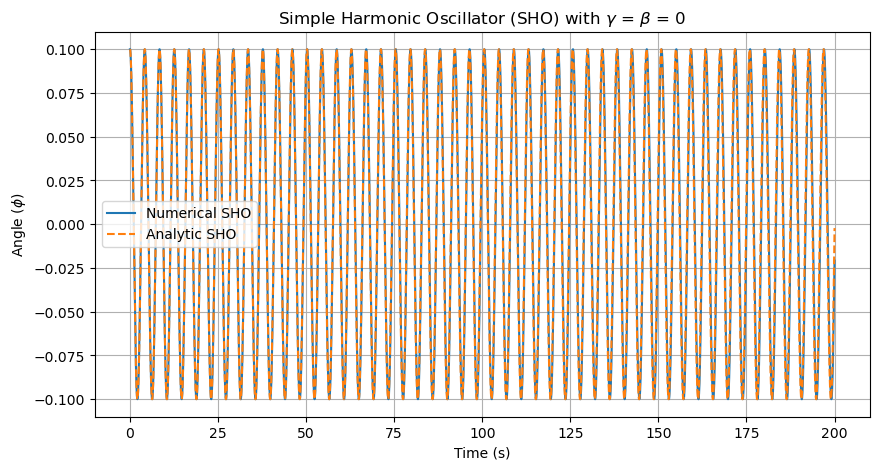

In [119]:
def create_chaotic_pend_function(two_beta, omega0, gamma, omega_d):
    def chaotic_pend_fixed(x, t):
        phi, phi_dot = x
        phi_ddot = -omega0**2 * np.sin(phi) - two_beta * phi_dot + gamma * omega0**2 * np.cos(omega_d * t)
        return np.array([phi_dot, phi_ddot])
    return chaotic_pend_fixed

two_beta = 0.0
gamma = 0.0
omega0 = 1.5
omega_d = 1.0
chaotic_pend_func = create_chaotic_pend_function(two_beta, omega0, gamma, omega_d)

ts, xs = RK4(chaotic_pend_func, x_initial, time_step, n)

phi_values = xs[:, 0]
phi_SHO = x_initial[0] * np.cos(omega0 * ts)

plt.figure(figsize=(10, 5))
plt.plot(ts, phi_values, label='Numerical SHO')
plt.plot(ts, phi_SHO, label='Analytic SHO', linestyle='--')
plt.title(r'Simple Harmonic Oscillator (SHO) with $\gamma$ = $\beta$ = 0')
plt.xlabel('Time (s)')
plt.ylabel(r'Angle ($\phi$)')
plt.legend()
plt.grid()
plt.show()


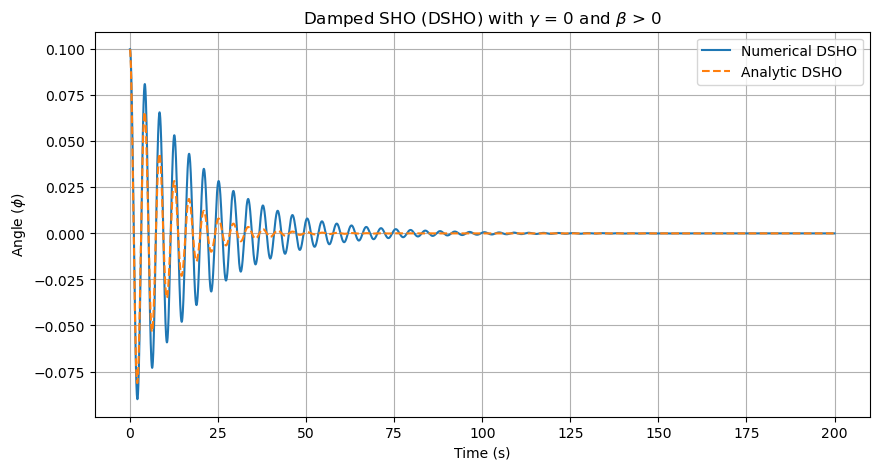

In [134]:
# DSHO with gamma = 0 and beta > 0
gamma = 0
two_beta = 0.1
chaotic_pend_func = create_chaotic_pend_function(two_beta, omega0, gamma, omega_d)
ts, xs = RK4(chaotic_pend_func, x_initial, time_step, n)
phi_values = xs[:, 0]
phi_DSHO = x_initial[0] * np.exp(-two_beta * ts) * np.cos(np.sqrt(omega0**2 - (two_beta**2)) * ts)

plt.figure(figsize=(10, 5))
plt.plot(ts, phi_values, label='Numerical DSHO')
plt.plot(ts, phi_DSHO, label='Analytic DSHO', linestyle='--')
plt.title(r'Damped SHO (DSHO) with $\gamma$ = 0 and $\beta$ > 0')
plt.xlabel('Time (s)')
plt.ylabel(r'Angle ($\phi$)')
plt.legend()
plt.grid()
plt.show()

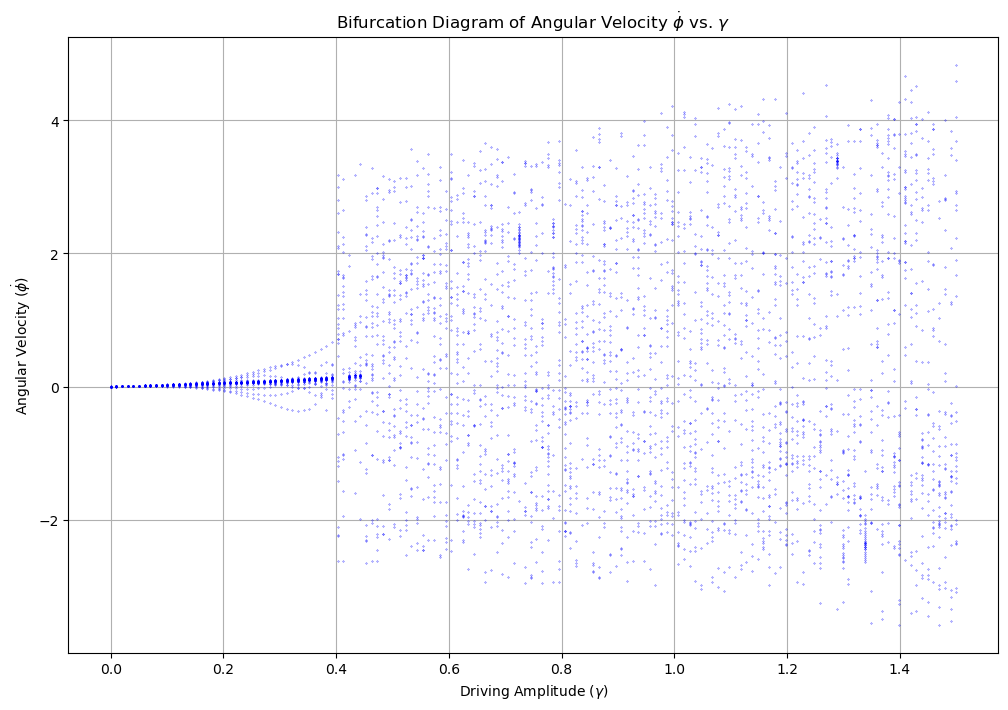

In [121]:
# bifuraction using phi dot
gamma_values = np.linspace(0, 1.5, 150)
bifurcation_points = []

for gamma in gamma_values:
    two_beta = 0.1 
    chaotic_pend_func = create_chaotic_pend_function(two_beta, omega0, gamma, omega_d)
    ts, xs = RK4(chaotic_pend_func, x_initial, time_step, n)
    phi_dot_values = xs[:, 1]

    # aligning T_d with driving force
    T_d = 2 * np.pi / omega_d
    # creates time steps based on T_d
    sample_indices = np.arange(int(T_d / time_step), len(ts), int(T_d / time_step))
    # phi dot values at those time steps
    sampled_phi_dots = phi_dot_values[sample_indices]

    bifurcation_points.append(sampled_phi_dots)

plt.figure(figsize=(12, 8))
for i, gamma in enumerate(gamma_values):
    # plots bifuraction point at the "indice" gamma vs. the actual point
    plt.plot([gamma] * len(bifurcation_points[i]), bifurcation_points[i], 'b.', markersize=0.5)
plt.title(r'Bifurcation Diagram of Angular Velocity $\dot{\phi}$ vs. $\gamma$')
plt.xlabel(r'Driving Amplitude ($\gamma$)')
plt.ylabel(r'Angular Velocity ($\dot{\phi}$)')
plt.grid()
plt.show()


I made a bunch of key changes this week and somewhat started from scratch after carefully reading your comments from the past two weeks. Specifcally in the first week you had said to plot when $\gamma = \beta = 0$ and $\gamma = 0$ $\beta \gt 0$. Specifically in terms of bifurcation, you had said to plot $\dot{\phi}$ vs. $\gamma$, this came out to be a much better plot since it is clear when their is chaos vs. a normal periodicity. I small adjustment was using the "lambda" thing in python. I remember we had talked about it for turning a function of mulptiple variables into a function of two. Although I got a little confused when using it and ended up making it harder for myself by including a function in a function (like we have done in the past). Another change I made that helped the bifuraction code was changing $\dot{\phi}$'s time interval to $T_d$ where the period was based on the driving force: $T_d = \frac{2\pi}{\omega_d}$. I also added a range for the RK4 function since, while hard to visualize, $\phi$ should not exceed $2\pi$. 

In terms of my plan for next week, I am curious as to what you have to say for what to do from here. Bifurcation went a lot more smoothly than I expected. I am curious to look into some of the $\gamma$ values that are periodic, and the "smooth-looking" curve in the bottom right of the bifuraction graph. Maybe something interesting would be to make an animation what the pendulum might look like in terms of x and y at different gamma values? I am curious to here your thoughts.  